# 泰坦尼克号数据分析

**Titanic号的事故让人唏嘘，而影视作品中更是让更多人了解事情的经过。
得到数据集后，我对乘客的生还率到底多少，以及具有哪些特征的乘客生还率更高很感兴趣。
在影视作品‘Titanic’中，卡梅隆导演生动的表现了Titanic事故发生后的逃生过程中，男乘客在生死面前绅士的考虑了妇孺优先的原则；也表现了在逃生过程中，不同仓位的乘客优先级别不同。这些都是事实，还是影视作品的创造？拿到了乘客数据，我们可以分析探索看一看了。**

## 1.数据载入及整理
首先，加载必要的库函数,并读取数据，然后对数据进行初步观察。

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
titanic_data=pd.read_csv('titanic-data.csv')
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


通过观察，发现部分数据缺失，体现为'NAN'，接下来通过对各行数据的数据进行统计，进一步进行完整性进行检查。


In [4]:
titanic_data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

通过count方法，观察数据的数量，经观察发现其中'Age'、'Embarked'列有少量数据缺失，Cabin'列有大量数据缺失。
经观察，发现：  
1.'Cabin'数据缺失较多，本次分析拟暂不利用此数据；  
2.其他的缺失包括：‘Age’,Embarked数据少量缺失，根据这两类数据的性质，可以通过将其更改为数据0，再在分析中筛选，继续利用此数据。  
因此，接下来通过fillna方法，用数字0替代缺失数据，生成排除NAN的数据，并存储。

In [5]:
titanic_data_filled=titanic_data.fillna(0)

## 2.分析目标初选
经过数据初步观察和完整性处理，根据兴趣，我们拟进行如下分析：  
**分析目标：乘客生还率相关因素，及因素对生还率的影响。**  

根据我们之前对Titanic号的了解和数据可用性，我们拟对如下因素对生还率的影响进行分析：

**分析因素：  
1.乘客性别('Sex');因为我们想知道，传说中的在生死面前，男人仍然保持照顾妇孺的绅士风度，是真的吗？  
2.乘客年龄('Age'):同上    
3.乘客仓位('Pclass'):因为我们想知道，更优的仓位真的优先逃跑生？  
4.乘客单身或有家人同行('SibSp','Parch')：有家人的乘客，是否会获得更高的生还率？  
5.乘客登船地点('Embarked')：这个只是好奇了，既然有数据而且很完整，那就看看登船地点是否会和生还率有影响。**



## 3.数据观察及统计
首先，我们拟对乘客的组成进行初步统计和观察。

### 3.1总生还率
计算所有数据中的总乘客人数，生还乘客人数，及生还率如下。生还率约38.38%。

In [6]:
Passenger_total=titanic_data.PassengerId.count()
Passenger_survived=titanic_data.Survived.sum()
Total_survive_rate=Passenger_survived*1.0/Passenger_total
print 'Total passengers:',Passenger_total
print 'Survived Passengers:',Passenger_survived
print 'Survive rate:',Total_survive_rate

Total passengers: 891
Survived Passengers: 342
Survive rate: 0.383838383838


### 3.2男女比例
计算所有乘客中的男女比例如下。得到女性占总人数比例约35.24%。显然男性乘客数量更多。

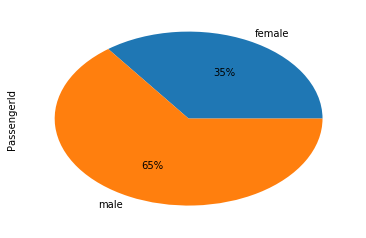

In [7]:
#计算男女各占总人数比
Sex_rate=titanic_data.groupby('Sex').PassengerId.count()/Passenger_total
Sex_rate.plot(kind='pie',grid='on',autopct='%.0f%%')
plt.show()


### 3.4年龄比例
计算乘客各个年龄段性别比例。
通过在网上搜索，我们这里对年龄按如下进行分段：   
定义幼儿(infant) 为0~6岁  
定义儿童(child) 为7~15岁  
定义壮年(grow_up)为15~55岁  
定义老年(old)为56以上  
各个阶段人数计算及展示如下：

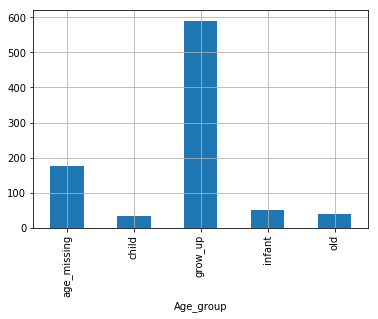

In [8]:
bins=[-1,0, 7, 15, 55, 100]
labe=['age_missing','infant','child','grow_up','old']
titanic_data_filled['Age_group']=pd.cut(titanic_data_filled['Age'],bins,labels=labe)
age_grouped=titanic_data_filled.groupby('Age_group').Age.count()
age_grouped.plot(kind='bar',grid='on')
plt.show()

### 3.4仓位比例统计
计算乘客各个仓位比例。可以看到数据集中titanic号乘客中55%为3等舱，24%为1等仓，20%为2等仓。其实看下来1等仓的比例还是很高的，可见这个轮船属于比较豪华的。

Pclass
1    0.242424
2    0.206510
3    0.551066
Name: PassengerId, dtype: float64


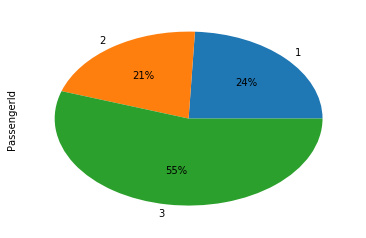

In [9]:
Pclass_rate=titanic_data.groupby('Pclass').PassengerId.count()/Passenger_total
print Pclass_rate
Pclass_rate.plot(kind='pie',grid='on',autopct='%.0f%%')
plt.show()

### 3.4独行乘客统计
通过SibSp,Parch对独行登船人数进行统计，发现约一半的旅客是独自登船的（无直系亲属同行）

In [10]:
SOlOer=titanic_data[(titanic_data['SibSp']==0)&(titanic_data['Parch']==0)]
SOlOer.PassengerId.count()

537

### 3.5登船港口统计
通过embarked对不同港口登船人数进行统计,发现大多数乘客从Southampton登船

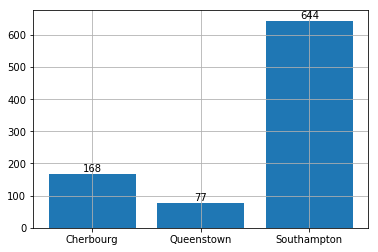

In [11]:
passenger_Embarked=titanic_data.groupby('Embarked').PassengerId.count()
plt.bar([1,2,3],[passenger_Embarked['C'],passenger_Embarked['Q'],passenger_Embarked['S']])
plt.xticks([1,2,3],['Cherbourg','Queenstown','Southampton'])
plt.grid(True)
for a,b in zip([1,2,3],[passenger_Embarked['C'],passenger_Embarked['Q'],passenger_Embarked['S']]):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)
plt.show()

## 4.生还率分析
通过上一节的统计，我们对乘客的特点有了更多的了解，接下来我们就开始针对不同类型的乘客的生还率进行分析。

### 4.1性别与生还率的关系
首先分析性别与生还率的关系,下图可以看出，女性乘客的生还率很高，远高于男性乘客，可见确实在逃生过程中，做的了妇女优先。

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


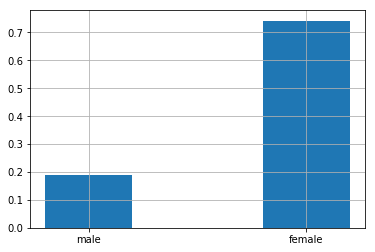

In [12]:
Sex_survived_rate=titanic_data.groupby('Sex').Survived.mean()
print Sex_survived_rate
plt.bar([1,2],[Sex_survived_rate['male'],Sex_survived_rate['female']],0.4)
plt.xticks([1,2],['male','female'])
plt.grid(True)
plt.show()

接下来想看一下，未生还的妇女，是否有什么共同点呢？是否未生还的妇女因为年龄原因而未生还？如下计算，可知未生还妇女的平均年龄为19.8岁，为青壮年，通常青壮年比老年应更有机会逃生，可见不是这个原因。

In [13]:
titanic_data_filled[(titanic_data['Survived']==0)&(titanic_data['Sex']=='female')].Age.mean()

19.790123456790123

那么是否是仓位原因呢？如下计算可知很有可能，如下计算可见，绝大多数未生还妇女，均来自三等仓位。

In [14]:
titanic_data[(titanic_data['Survived']==0)&(titanic_data['Sex']=='female')].groupby('Pclass').PassengerId.count()

Pclass
1     3
2     6
3    72
Name: PassengerId, dtype: int64

### 4.2年龄与生还率的关系
接下来分析年龄与生还率的关系

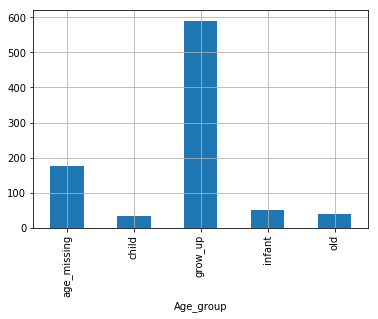

In [15]:
bins=[-1,0, 7, 15, 55, 100]
labe=['age_missing','infant','child','grow_up','old']
titanic_data_filled['Age_group']=pd.cut(titanic_data_filled['Age'],bins,labels=labe)
age_grouped=titanic_data_filled.groupby('Age_group').Age.count()
age_grouped.plot(kind='bar',grid='on',)
plt.show()

Age_group
age_missing    0.293785
child          0.454545
grow_up        0.387479
infant         0.680000
old            0.300000
Name: Survived, dtype: float64


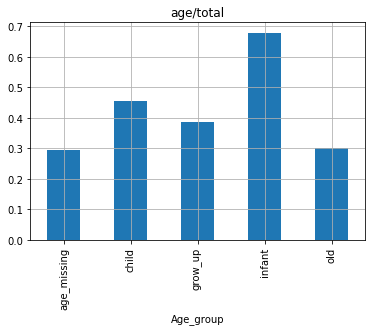

In [16]:
age_survived=titanic_data_filled.groupby('Age_group').Survived.mean()
print age_survived
age_survived.plot(kind='bar',grid='on')
plt.title('age/total')
plt.show()

由以上分析可知，幼儿（6岁以下）生还率很高，达到70%。可见逃生时确实在照顾儿童。  
而7~15岁的儿童生还率没有那么高，这可能是因为幼儿和儿童总数量其实不大，受单个数据影响较大。也可能是因为当时接近15岁时已经被认为是成年了，是否已经被按当做成年来对待。  
事实上因为数据量很小，我们可以直接观察未生还的儿童和幼儿数据。观察规律。  
我们先观察未生还的幼儿的数据。

In [17]:
titanic_data_filled[(titanic_data_filled['Survived']==0)&(titanic_data_filled['Age_group']=='infant')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,0,S,infant
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,0,Q,infant
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,0,S,infant
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,0,S,infant
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,0,S,infant
164,165,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,0,S,infant
171,172,0,3,"Rice, Master. Arthur",male,4.0,4,1,382652,29.1250,0,Q,infant
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S,infant
278,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.1250,0,Q,infant
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,infant


很遗憾，未生还的幼儿，几乎全来自3等舱。  
接下来观察未生还儿童数据。

In [18]:
titanic_data_filled[(titanic_data_filled['Survived']==0)&(titanic_data_filled['Age_group']=='child')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,0,S,child
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,0,S,child
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,0,S,child
111,112,0,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,0,C,child
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.3750,0,S,child
182,183,0,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,4,2,347077,31.3875,0,S,child
352,353,0,3,"Elias, Mr. Tannous",male,15.0,1,1,2695,7.2292,0,C,child
419,420,0,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.1500,0,S,child
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9000,0,S,child
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.2750,0,S,child


未生还儿童同样，全部来自3等仓。
和猜测的一样，未生还的儿童中，有多个接近15岁的。

### 4.3仓位与生还率的关系
接下来分析仓位与生还率的关系

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


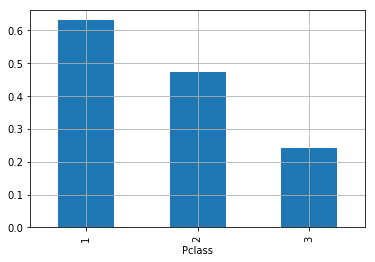

In [19]:
Pclass_data=titanic_data.groupby('Pclass')
Pclass_survived=Pclass_data.Survived.mean()
print Pclass_survived
Pclass_survived.plot(kind='bar',grid='on')
plt.show()

很明显，仓位越高，生还率越高。那么，会不会是因为不同仓位的乘客，因为男女、性别的比例不同，造成了生还率的差别呢？
我们先看一下不同仓位的乘客，男女比例有何不同,并观察分组内各组乘客的数量。

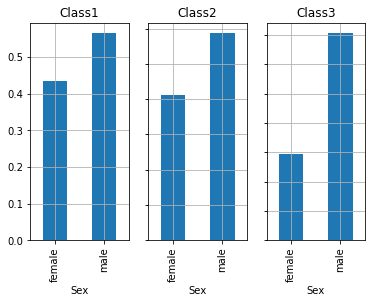

class 1 passengers: Sex
female     94
male      122
Name: Name, dtype: int64
class 2 passengers: Sex
female     76
male      108
Name: Name, dtype: int64
class 3 passengers: Sex
female    144
male      347
Name: Name, dtype: int64


In [32]:
class_1_data=titanic_data[titanic_data['Pclass']==1]
class_2_data=titanic_data[titanic_data['Pclass']==2]
class_3_data=titanic_data[titanic_data['Pclass']==3]
class_1_sex=class_1_data.groupby('Sex').Name.count()/class_1_data.Name.count()
class_2_sex=class_2_data.groupby('Sex').Name.count()/class_2_data.Name.count()
class_3_sex=class_3_data.groupby('Sex').Name.count()/class_3_data.Name.count()
plt.subplot(1,3,1)
class_1_sex.plot(kind='bar',grid='on',sharey=True,title='Class1')
plt.subplot(1,3,2)
class_2_sex.plot(kind='bar',grid='on',sharey=True,title='Class2')
plt.subplot(1,3,3)
class_3_sex.plot(kind='bar',grid='on',sharey=True,title='Class3')
plt.show()
print 'class 1 passengers:',class_1_data.groupby('Sex').Name.count()
print 'class 2 passengers:',class_2_data.groupby('Sex').Name.count()
print 'class 3 passengers:',class_3_data.groupby('Sex').Name.count()

从上面数据来看，确实1、2等仓比三等舱女性比例更高。这会不会是造成仓位生还率差异的主要原因呢？稍后我们详细分析。   
接下来我们看一下，各个仓位，年龄比例有个差别。  
计算各个仓位的平均年龄，得到：

In [21]:
print 'class_1 mean age=',class_1_data.Age.mean()
print 'class_2 mean age=',class_2_data.Age.mean()
print 'class_3 mean age=',class_3_data.Age.mean()

class_1 mean age= 38.2334408602
class_2 mean age= 29.8776300578
class_3 mean age= 25.1406197183


显然，1等仓乘客平均年龄更高一些，这也和常理符合，一般需要更大年龄才更有机会进入豪华仓位。  
但这并不能解释3个仓位的生还率的差异。按之前的年龄与生还率的差异，应该是年龄越小，生还率越高。  
那么我们再来回头来看看性别差异引起的差异。  
看看各个仓位舱的男女乘客的生还率分别是多少

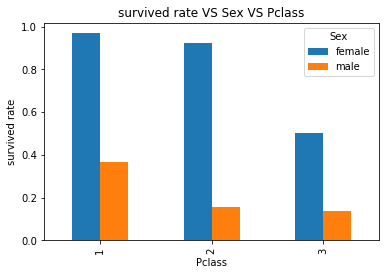

In [23]:
sr_vs_sex_vs_pclass=titanic_data.groupby(['Pclass','Sex']).Survived.mean().unstack().plot(kind='bar')
plt.title('survived rate VS Sex VS Pclass')
plt.ylabel('survived rate')
plt.show()

上图可以清楚的显示：  
随着仓位变好，男女乘客的生还率均有提高。3等舱的乘客，尤其是女乘客，生还率下降很快。综合前文所述各个仓位男女乘客的数量，虽1、2号人数略少，受偶然因素影响较大，但本图表中1、2等仓和3等仓女乘客的生还率、以及1号仓与2、3号仓男乘客生还率的差异均十分巨大，可认为偶然因素引起此差异的可能性很小。

### 4.4独行和有家人同行和生还率的关系
分析行和有家人同行和生还率的关系，根据常规经验分析，这两者应该不会有显著差异。

0.303538175047


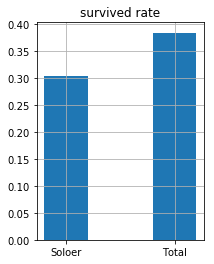

In [24]:
SOlOer_survive_rate=SOlOer.Survived.mean()
print SOlOer_survive_rate
plt.figure(figsize=(3,4))
plt.bar([1,2],[SOlOer_survive_rate,Total_survive_rate],0.4)
plt.xticks([1,2],['Soloer','Total'])
plt.title('survived rate')
plt.grid(True)
plt.show()

独行的旅客生还率略低于总生还率，但差别不大，这可能是由于儿童都是与家人同行，而儿童生还率较高引起的影响。

### 4.5不同登船港口与生还率的关系
不同登船港口与生还率的关系，根据常规经验分析，这两者应该是没有关系。  
因此这里计算不同港口登船乘客生还率及人数。

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


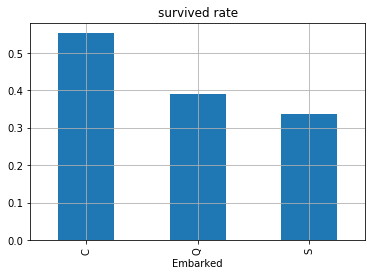

In [35]:
Embarked_survive_rate=titanic_data.groupby('Embarked').Survived.mean()
print Embarked_survive_rate
Embarked_survive_rate.plot(kind='bar',grid='on')
plt.title('survived rate')
plt.show()

统计结果非常有趣，Cherbourg登船的乘客生还率明显高于其他两处港口登船的乘客。  
从前文3.5节可知，三个港口的登船人数分别是168、77、644人，其中Q港登船人数略少，统计结果可能受随机因素影响更大，但总体趋势可信。  
那么产生这个比较大的差异的原因是什么呢？我们可以研究一下不同港口登船的乘客的特征。
首先研究一下不同港口登船乘客的性别比例是否有别。

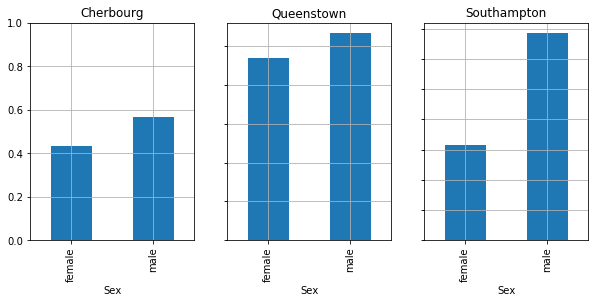

In [26]:
Cherbourg_data=titanic_data[titanic_data['Embarked']=='C']
Queenstown_data=titanic_data[titanic_data['Embarked']=='Q']
Southampton_data=titanic_data[titanic_data['Embarked']=='S']
C_survived_rate_sex=Cherbourg_data.groupby('Sex').Name.count()/Cherbourg_data.Sex.count()
Q_survived_rate_sex=Queenstown_data.groupby('Sex').Name.count()/Queenstown_data.Sex.count()
S_survived_rate_sex=Southampton_data.groupby('Sex').Name.count()/Southampton_data.Sex.count()
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
C_survived_rate_sex.plot(kind='bar',grid='on',sharey=True,title='Cherbourg')
plt.ylim(0,1)
plt.subplot(1,3,2)
Q_survived_rate_sex.plot(kind='bar',grid='on',sharey=True,title='Queenstown')
plt.subplot(1,3,3)
S_survived_rate_sex.plot(kind='bar',grid='on',sharey=True,title='Southampton')
plt.show()


由上表可见，事实上Cherbourg和Queenstown登船的乘客的女性比例均较高，高于Southampton登船的乘客。
这可以解释为何C港和Q港登船乘客生还率高于Q港登船乘客，但无法解释为何C港登船乘客为何生还率明显高,而Q港登船乘客生还率只是略高。
接下来我们将分析一下不同港口登船乘客的年龄。

In [27]:
print 'mean age of passengers from Cherbourg=',Cherbourg_data.Age.mean()
print 'mean age of passengers from Queenstown=',Queenstown_data.Age.mean()
print 'mean age of passengers from Southampton=',Southampton_data.Age.mean()

mean age of passengers from Cherbourg= 30.8147692308
mean age of passengers from Queenstown= 28.0892857143
mean age of passengers from Southampton= 29.4453971119


平均年龄很接近，可见不是年龄分布造成的。  
接下来分析一下是不是各个港口登船的乘客仓位比例不同。

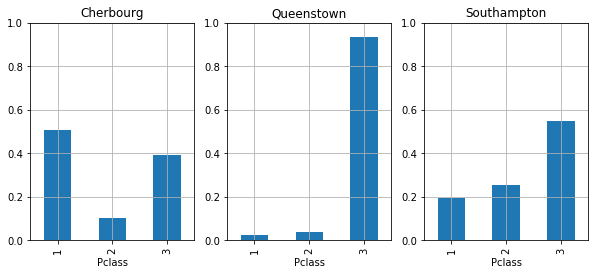

Cherbourg passengers Pclass: Pclass
1    85
2    17
3    66
Name: Name, dtype: int64
Queenstown passengers Pclass: Pclass
1     2
2     3
3    72
Name: Name, dtype: int64
Southampton passengers Pclass: Pclass
1    127
2    164
3    353
Name: Name, dtype: int64


In [36]:
Cherbourg_pclass_data=Cherbourg_data.groupby('Pclass').Name.count()/Cherbourg_data.Name.count()
Queenstown_pclass_data=Queenstown_data.groupby('Pclass').Name.count()/Queenstown_data.Name.count()
Southampton_pclass_data=Southampton_data.groupby('Pclass').Name.count()/Southampton_data.Name.count()
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
Cherbourg_pclass_data.plot(kind='bar',grid='on',title='Cherbourg')
plt.ylim(0,1)
plt.subplot(1,3,2)
Queenstown_pclass_data.plot(kind='bar',grid='on',title='Queenstown')
plt.ylim(0,1)
plt.subplot(1,3,3)
Southampton_pclass_data.plot(kind='bar',grid='on',title='Southampton')
plt.ylim(0,1)
plt.show()

print 'Cherbourg passengers Pclass:',Cherbourg_data.groupby('Pclass').Name.count()
print 'Queenstown passengers Pclass:',Queenstown_data.groupby('Pclass').Name.count()
print 'Southampton passengers Pclass:',Southampton_data.groupby('Pclass').Name.count()

这里我们看出了明显的区别，C港登船的乘客明显1等、2等仓的比例更高，这样就说得通了,和之前的分析相符。  
而Q港登船的乘客，只有个位数个是1、2等仓的，此数据很小，说服力很差，其生还率对整体数据影响力也很小。

## 5.结论总结
经过以上分析，我们对titanic号的生还数据有了一定的认识，主要结论如下：  
1.titani号总生还率很低，确实是海上灾难。  
2.分析发现主要和生还率相关的数据是性别、年龄、和仓位。  
3.女性生还率高于男性。  
4.儿童，尤其是6岁以下儿童，生还率较高。  
5.1等舱生还率高于2等舱，3等舱生还率最低。  
6.即使是1等舱和2等舱，男乘客生还率仍然低于女乘客。  
7.3等舱的女乘客和儿童的生还率明显低于1、2等舱的乘客，但即便如此，3等舱的女乘客生还率仍然高于1等舱男乘客的生还率。  
8.我们还分析了其他因素，如是否单身独行乘船，及不同登船港口的乘客的生还率的规律，发现确有差别，但这个差别很可能实际上是由年龄、性别、和仓位的差别造成的。  

## 6.存在的问题及讨论
1.本分析基于的数据，分析的乘客数量为891名，实际上这只是部分乘客，根据资料，泰坦尼克号载着1316号乘客和891名船员。我们这里分析的是部分乘客的数量，数量仅占总乘客数量的67.7%。因此实际这里的分析有可能会和实际产生偏差，这取决于数据的来源，假设数据是随机选取的，那么由于数据数量尚可，此分析还是很有代表性的；假设数据是人为选出的，那么其可信度就大打折扣了。   
2.很可能还有其他因素影响生还率，比如仓位的位置，是否有些位置有利于逃生，有些位置不利于逃生呢，这里因为数据缺失无从判断。比如乘客的国籍（会引起语言不通问题）是否会影响生还率呢，这里也没有数据可分析。  
3.分析过程中，部分乘客年龄数据缺失，而且缺失比较较大。因此实际上这部分分析有可能存在问题。假设缺失数据是随机产生的，那么分析的可信度仍然较高，假设是人为选取的，那么可信度则大打折扣。  

## 7.参考资料
1.www.baidu.com  
2.www.google.com  
3.https://github.com/kailashahirwar/cheatsheets-ai  
4.http://www.cnblogs.com/yxzfscg/p/5000867.html  
5.http://www.cnblogs.com/yxzfscg/p/5000867.html  
6.《利用Python进行数据分析》  